In [1]:
import sys
sys.path.append('../..')

In [2]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from DomainPrediction.utils import helper

In [4]:
data_path = '../../../Data/al_test_experiments/Tdomain'

### Load Data for processing

In [ ]:
df = pd.read_csv(os.path.join(data_path, 'Tdomainr2.csv'))

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
wt = helper.read_fasta(os.path.join(data_path, 'Tdomain_WT.fasta'), mode='str')[0]

In [ ]:
len(wt)

In [ ]:
## sanilty check sequences
check_seqs = helper.read_fasta(os.path.join(data_path, 'round_1_extraction.fasta'), mode='str')
for i, seq in enumerate(check_seqs):
    assert df['Sequence'][i] == seq

In [ ]:
def hamming_distance(seq1, seq2):
    # Ensure the sequences are of the same length
    if len(seq1) != len(seq2):
        raise ValueError("Sequences must be of equal length to compute Hamming distance.")
    
    # Count differences
    return sum(c1 != c2 for c1, c2 in zip(seq1, seq2))

In [ ]:
dist_matrix = np.eye(df['Sequence'].shape[0])
sequences = df['Sequence'].to_numpy()
for i in range(sequences.shape[0]):
    for j in range(sequences.shape[0]):
        dist_matrix[i, j] = hamming_distance(sequences[i], sequences[j])

In [ ]:
dist_matrix[0,:]

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(dist_matrix, cmap='hot')
plt.colorbar(shrink=0.75)
plt.show()

In [ ]:
dist_from_wt = []
for seq in df['Sequence']:
    dist_from_wt.append(hamming_distance(wt, seq))

fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.hist(dist_from_wt, bins=np.linspace(0, 100, 21))
plt.show()
# print(np.array(dist_from_wt))
# print(df['Name'].to_numpy())

#### Duplicates

In [ ]:
for name in df['Name']:
    _df = df[df['Sequence'] == df.loc[df['Name'] == name, 'Sequence'].iloc[0]]
    if _df.shape[0] > 1:
        print(name)

In [ ]:
df[df['Sequence'] == df.loc[df['Name'] == 'WT', 'Sequence'].iloc[0]]

In [ ]:
df[df['Sequence'] == df.loc[df['Name'] == 'ESM2', 'Sequence'].iloc[0]]

In [ ]:
df[df['Sequence'] == df.loc[df['Name'] == 'ESM2_EP_10_1_4', 'Sequence'].iloc[0]]

In [ ]:
df = df.drop_duplicates(subset='Sequence')

In [ ]:
df.shape

In [ ]:
for name in df['Name']:
    _df = df[df['Sequence'] == df.loc[df['Name'] == name, 'Sequence'].iloc[0]]
    if _df.shape[0] > 1:
        print(name)

#### Splitting

In [ ]:
dist_matrix = np.eye(df['Sequence'].shape[0])
sequences = df['Sequence'].to_numpy()
for i in range(sequences.shape[0]):
    for j in range(sequences.shape[0]):
        dist_matrix[i, j] = hamming_distance(sequences[i], sequences[j])

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(dist_matrix, cmap='hot')
plt.colorbar(shrink=0.75)
plt.show()

In [ ]:
df.shape[0], df['Name'].str.contains("ESM2").sum(), df['Name'].str.contains("esm3").sum(), df['Name'].str.contains("evodiff").sum() #need 13 more to set up a dataset

In [ ]:
ai_gen = ['WT', 'ESM1', 'ESM2', 'ESM3', 'ESM4', 'IN1', 'IN2', 'IN3', 'IN4',
            'IN5', 'IN6', 'IN7', 'esm3_gen_17', 'esm3_str_gen_53',
            'esm3_str_gen_170', 'esm3_gen_192', 'esm3_gen_333',
            'esm3_str_gen_365', 'esm3_gen_385', 'evodiff_gen_77',
            'II_guidance-ESM3', 'Test-IN1-improved', 'Test-IN4-improved',
            'Test-IN7-improved', 'evodiff_gen_21', 'evodiff_gen_88',
            'evodiff_gen_155', 'evodiff_gen_357', 'esm3_gen_93',
            'esm3_str_gen_314', 'esm3_str_gen_323', 'II guidance-WT',
            'II guidance-ESM2', 'II guidance-IN2', 'prob_guidancd-ESM2',
            'Test-IN2-improved', 'Test-IN5-improved']

mask = df['Name'].isin(ai_gen)

dist_matrix = np.eye(df[mask]['Sequence'].shape[0])
sequences = df[mask]['Sequence'].to_numpy()
for i in range(sequences.shape[0]):
    for j in range(sequences.shape[0]):
        dist_matrix[i, j] = hamming_distance(sequences[i], sequences[j])

plt.figure(figsize=(10,10))
plt.imshow(dist_matrix, cmap='hot')
plt.colorbar(shrink=0.75)
plt.xticks(np.arange(len(ai_gen)), ai_gen, size=7, rotation=90)
plt.yticks(np.arange(len(ai_gen)), ai_gen, size=7)
plt.show()

In [ ]:
df.shape[0], df['Name'].str.contains("ESM2").sum(), df['Name'].str.contains("esm3").sum(), df['Name'].str.contains("evodiff").sum() #need 13 more to set up a dataset

In [ ]:
df.assign(split_id=2)
df.loc[df['Name'].str.contains("ESM2"), 'split_id'] = 0
df.loc[df['Name'].str.contains("esm3_str"), 'split_id'] = 0
df.loc[df['Name'].str.contains("evodiff"), 'split_id'] = 0
df.loc[df['Name'].str.contains("esm3_gen"), 'split_id'] = 1

train_size = df[df['split_id']==2].shape[0]
val_size = df[df['split_id']==1].shape[0]
test_size = df[df['split_id']==0].shape[0]
print(f"train: {train_size}, val: {val_size}, test: {test_size}")

In [ ]:
dist_matrix = np.eye(df['Sequence'].shape[0])
sequences = np.concatenate((df.loc[df['split_id']==2, 'Sequence'].to_numpy(), df.loc[df['split_id'].isin([0, 1]), 'Sequence'].to_numpy()))
for i in range(sequences.shape[0]):
    for j in range(sequences.shape[0]):
        dist_matrix[i, j] = hamming_distance(sequences[i], sequences[j])

plt.figure(figsize=(10,10))
plt.imshow(dist_matrix, cmap='hot')
plt.colorbar(shrink=0.75)
plt.xticks(np.arange(len(df)), [2]*(df['split_id']==2).sum() + [0]*df['split_id'].isin([0,1]).sum(), size=7, rotation=0)
plt.show()

#### creating new df

In [ ]:
df_new = df[['Name', 'Sequence', 'norm_WT', 'split_id']].copy()
df_new.columns = ['name', 'seq', 'fitness_raw', 'split_id']

In [ ]:
df_new.head()

In [ ]:
n_muts = []
for i, row in df_new.iterrows():
    variant_seq = row["seq"]
    assert len(variant_seq) == len(wt)
    n = 0
    for a, b in zip(variant_seq, wt):
        if a != b:
            n += 1
    
    n_muts.append(n)

df_new['n_mut'] = n_muts

In [ ]:
df_new.head()

In [ ]:
df_new['n_mut'].unique()

In [ ]:
df_new['n_mut'].to_numpy()

In [ ]:
dist_matrix = np.eye(df_new['seq'].shape[0])
sequences = df_new['seq'].to_numpy()
for i in range(sequences.shape[0]):
    for j in range(sequences.shape[0]):
        dist_matrix[i, j] = hamming_distance(sequences[i], sequences[j])

assert (df_new['n_mut'].to_numpy() == dist_matrix[0]).all()

In [ ]:
from collections import Counter

In [ ]:
for split in df_new['split_id'].unique():
    temp = df_new.loc[df_new['split_id']==split, 'n_mut'].unique()
    print(f'n mutation for split {split}: {temp}')
    print(Counter(df_new.loc[df_new['split_id']==split, 'n_mut']))

In [ ]:
temp = []
for x in df_new['fitness_raw']:
    if x == 0:
        temp.append(1e-6)
    else:
        temp.append(x)

In [ ]:
df_new['fitness_log'] = np.log(temp)

In [ ]:
# file = os.path.join(data_path, 'dataset_2_tdomain.csv')
# df_new.to_csv(file, index=False)

### Load data for analysis

In [5]:
file = os.path.join(data_path, 'dataset_2_tdomain.csv')
df_new = pd.read_csv(file)

Text(0.5, 1.0, 'Test')

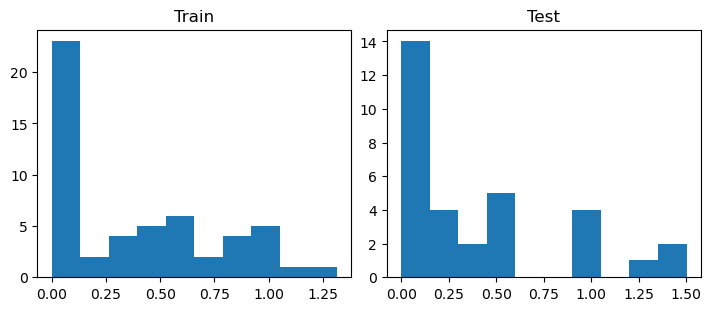

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(7,3), layout='constrained')
ax[0].hist(df_new.loc[df_new['split_id']==2, 'fitness_raw'])
ax[1].hist(df_new.loc[df_new['split_id'].isin([0, 1]), 'fitness_raw'])
ax[0].set_title('Train')
ax[1].set_title('Test')

Text(0.5, 1.0, 'Test')

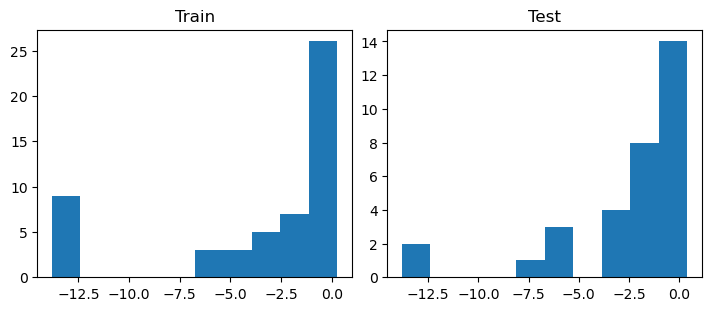

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(7,3), layout='constrained')
ax[0].hist(df_new.loc[df_new['split_id']==2, 'fitness_log'])
ax[1].hist(df_new.loc[df_new['split_id'].isin([0, 1]), 'fitness_log'])
ax[0].set_title('Train')
ax[1].set_title('Test')

In [8]:
df_new['fitness_log'].min()

-13.815510557964274

In [9]:
df_new.loc[df_new['fitness_raw'] == 0]

,name,seq,fitness_raw,split_id,n_mut,fitness_log
5,IN1,APGIEAYARPPYVAPQGERERLLASLWRELLRVPEVGANDSFFALG...,0.0,2,41,-13.815511
6,IN2,RPGIEAYAIPPFKAPKGERERLLAEYYKELLDVNEVSSNDSFFKLG...,0.0,2,54,-13.815511
8,IN4,APGPEAYPRAPFVAPEGERERLLAEILAELLDVPRVGAGDGFFALG...,0.0,2,52,-13.815511
9,IN5,QPAPAAHAVPPAVAPEGEVEFLLADIMKRLLNVSRVSANKRFFALG...,0.0,2,60,-13.815511
11,IN7,APPLAAYPTPPYRAPVGPREELLARIVKSVLKVDRVGADDGFLRLG...,0.0,2,58,-13.815511
12,esm3_gen_17,IPDASTLPTAEYVAPRTEVEQTLAGIWAELLGVEQVGIHDNFFDLG...,0.0,1,71,-13.815511
16,esm3_gen_333,QPDRAVLLEQAYVAPRTTLEEQLASIWSELLQRERVGIHDNFFELG...,0.0,1,74,-13.815511
45,GxpS_DESIGN-11,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,0.0,2,4,-13.815511
53,GxpS_DESIGN-22,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,0.0,2,26,-13.815511
54,GxpS_DESIGN-23,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,0.0,2,33,-13.815511


In [10]:
np.sort(df_new['n_mut'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7, 26, 33, 34, 37, 39, 41, 43, 44, 45,
       46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 71, 74, 78,
       89])

In [11]:
df_new[df_new['n_mut']==0]

,name,seq,fitness_raw,split_id,n_mut,fitness_log
0,WT,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,1.0,2,0,0.0


In [12]:
df_new.shape

(85, 6)

In [13]:
for name in df_new['name']:
    _df = df_new[df_new['seq'] == df_new.loc[df_new['name'] == name, 'seq'].iloc[0]]
    if _df.shape[0] > 1:
        print(name)

In [14]:
print(f"train: {(df_new['split_id']==2).sum()}, val: {(df_new['split_id']==1).sum()}, test: {(df_new['split_id']==0).sum()}")

train: 53, val: 5, test: 27


In [15]:
def hamming_distance(seq1, seq2):
    # Ensure the sequences are of the same length
    if len(seq1) != len(seq2):
        raise ValueError("Sequences must be of equal length to compute Hamming distance.")
    
    # Count differences
    return sum(c1 != c2 for c1, c2 in zip(seq1, seq2))

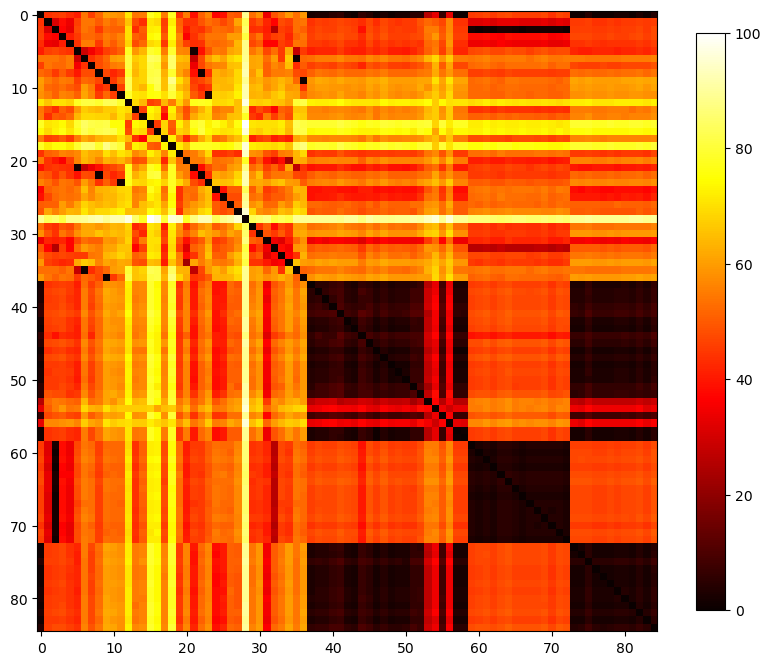

In [16]:
dist_matrix = np.eye(df_new['seq'].shape[0])
sequences = df_new['seq'].to_numpy()
for i in range(sequences.shape[0]):
    for j in range(sequences.shape[0]):
        dist_matrix[i, j] = hamming_distance(sequences[i], sequences[j])

plt.figure(figsize=(10,10))
plt.imshow(dist_matrix, cmap='hot')
plt.colorbar(shrink=0.75)
plt.show()

(17, 68)


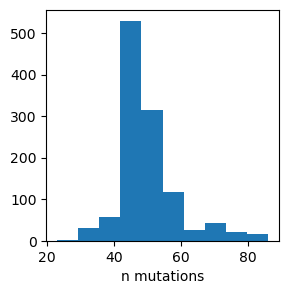

In [17]:
esm2_dist = dist_matrix[df_new['name'].str.contains('ESM2')]
esm2_dist = esm2_dist[:, ~df_new['name'].str.contains('ESM2')]
print(esm2_dist.shape)
plt.figure(figsize=(3,3))
plt.hist(esm2_dist.flatten())
plt.xlabel('n mutations')
plt.show()

(15, 70)


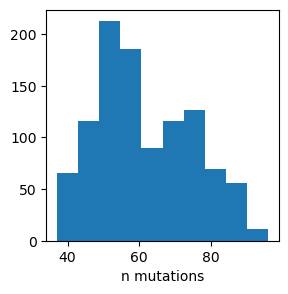

In [18]:
gen_dist = dist_matrix[df_new['name'].str.contains('esm3') | df_new['name'].str.contains('evodiff')]
gen_dist = gen_dist[:, ~(df_new['name'].str.contains('esm3') | df_new['name'].str.contains('evodiff'))]
print(gen_dist.shape)
plt.figure(figsize=(3,3))
plt.hist(gen_dist.flatten())
plt.xlabel('n mutations')
plt.show()

(32, 53)


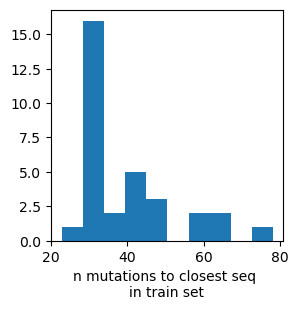

In [19]:
test_train_dist = dist_matrix[df_new['split_id'].isin([0, 1])]
test_train_dist = test_train_dist[:, ~df_new['split_id'].isin([0, 1])]
print(test_train_dist.shape)
plt.figure(figsize=(3,3))
plt.hist(test_train_dist.min(axis=1).flatten())
plt.xlabel('n mutations to closest seq \nin train set', size=10)
plt.xlim(left=20)
plt.show()

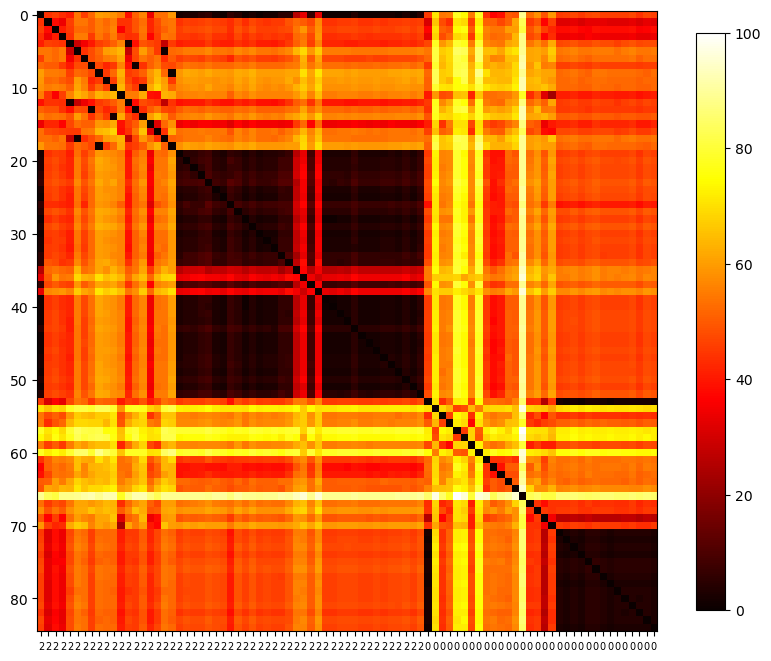

In [20]:
dist_matrix = np.eye(df_new['seq'].shape[0])
sequences = np.concatenate((df_new.loc[df_new['split_id']==2, 'seq'].to_numpy(), df_new.loc[df_new['split_id'].isin([0, 1]), 'seq'].to_numpy()))
for i in range(sequences.shape[0]):
    for j in range(sequences.shape[0]):
        dist_matrix[i, j] = hamming_distance(sequences[i], sequences[j])

plt.figure(figsize=(10,10))
plt.imshow(dist_matrix, cmap='hot')
plt.colorbar(shrink=0.75)
plt.xticks(np.arange(len(df_new)), [2]*(df_new['split_id']==2).sum() + [0]*df_new['split_id'].isin([0,1]).sum(), size=7, rotation=0)
plt.show()

/tmp/ipykernel_2266707/970443494.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['name'] = pd.Categorical(_df['name'], categories=ai_gen, ordered=True)


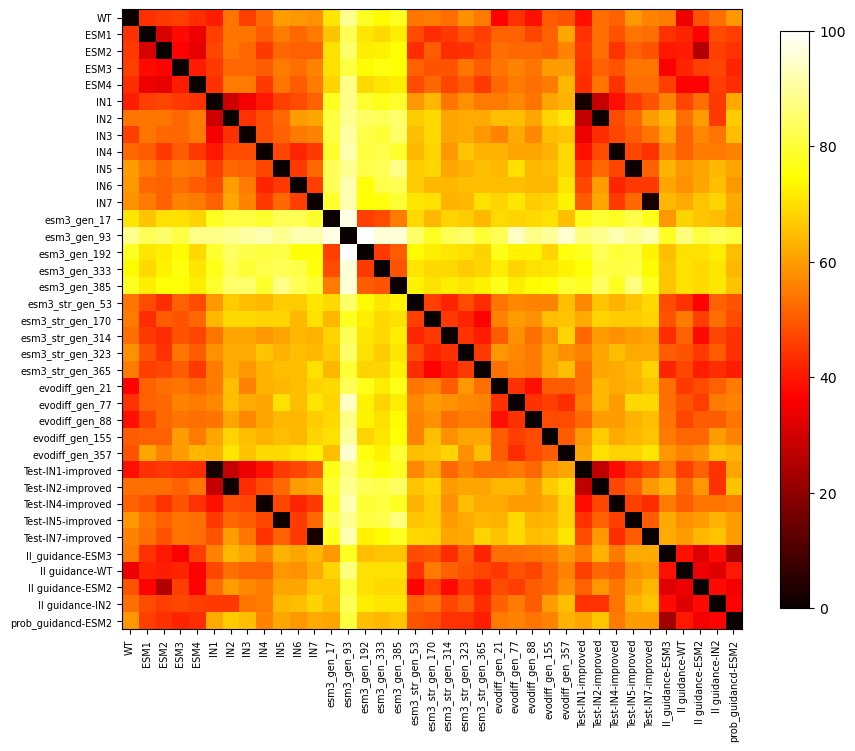

In [21]:
ai_gen = ['WT', 'ESM1', 'ESM2', 'ESM3', 'ESM4', 'IN1', 'IN2', 'IN3', 'IN4', 'IN5', 'IN6', 'IN7', 
          'esm3_gen_17', 'esm3_gen_93', 'esm3_gen_192', 'esm3_gen_333', 'esm3_gen_385', 
          'esm3_str_gen_53', 'esm3_str_gen_170', 'esm3_str_gen_314', 'esm3_str_gen_323', 'esm3_str_gen_365', 
          'evodiff_gen_21', 'evodiff_gen_77', 'evodiff_gen_88', 'evodiff_gen_155', 'evodiff_gen_357', 
          'Test-IN1-improved', 'Test-IN2-improved', 'Test-IN4-improved', 'Test-IN5-improved', 'Test-IN7-improved', 
          'II_guidance-ESM3', 'II guidance-WT', 'II guidance-ESM2', 'II guidance-IN2', 'prob_guidancd-ESM2']

mask = df_new['name'].isin(ai_gen)
_df = df_new[mask]
_df['name'] = pd.Categorical(_df['name'], categories=ai_gen, ordered=True)
_df = _df.sort_values('name')

dist_matrix = np.eye(_df['seq'].shape[0])
sequences = _df['seq'].to_numpy()
for i in range(sequences.shape[0]):
    for j in range(sequences.shape[0]):
        dist_matrix[i, j] = hamming_distance(sequences[i], sequences[j])

plt.figure(figsize=(10,10))
plt.imshow(dist_matrix, cmap='hot')
plt.colorbar(shrink=0.75)
plt.xticks(np.arange(len(ai_gen)), ai_gen, size=7, rotation=90)
plt.yticks(np.arange(len(ai_gen)), ai_gen, size=7)
plt.show()

/tmp/ipykernel_2266707/449588494.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['name'] = pd.Categorical(_df['name'], categories=ai_gen, ordered=True)


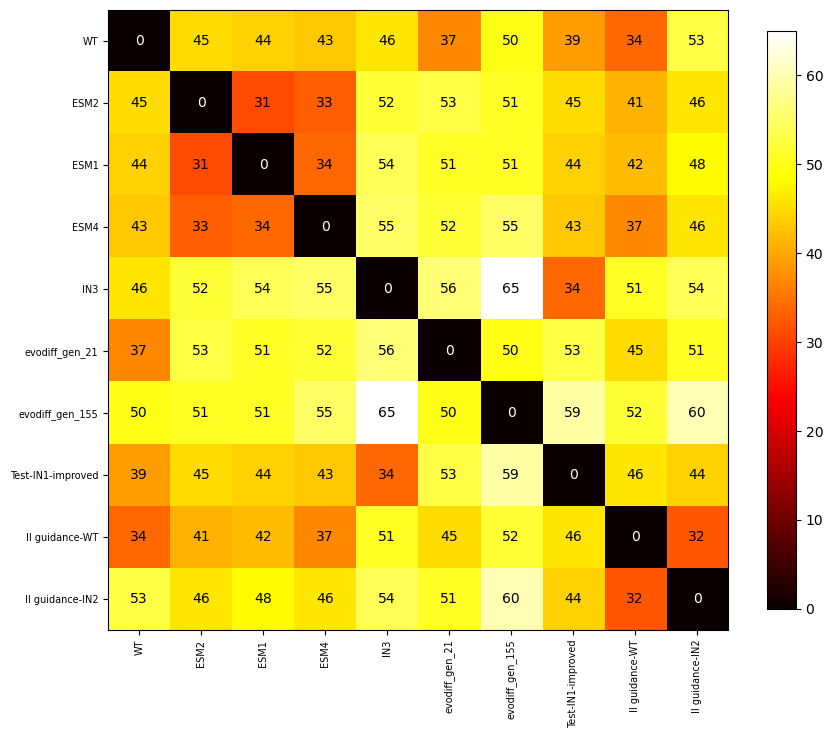

In [22]:
ai_gen = ['WT', 'ESM2', 'ESM1', 'ESM4', 'IN3', 
          'evodiff_gen_21', 'evodiff_gen_155',
          'Test-IN1-improved',
          'II guidance-WT', 'II guidance-IN2']

mask = df_new['name'].isin(ai_gen)
_df = df_new[mask]
_df['name'] = pd.Categorical(_df['name'], categories=ai_gen, ordered=True)
_df = _df.sort_values('name')

dist_matrix = np.eye(_df['seq'].shape[0])
sequences = _df['seq'].to_numpy()
for i in range(sequences.shape[0]):
    for j in range(sequences.shape[0]):
        dist_matrix[i, j] = hamming_distance(sequences[i], sequences[j])

plt.figure(figsize=(10,10))
plt.imshow(dist_matrix, cmap='hot')
plt.colorbar(shrink=0.75)
plt.xticks(np.arange(len(ai_gen)), ai_gen, size=7, rotation=90)
plt.yticks(np.arange(len(ai_gen)), ai_gen, size=7)

# Adding text annotations
for i in range(len(ai_gen)):
    for j in range(len(ai_gen)):
        plt.text(
            j, i, f"{int(dist_matrix[i, j])}",  # Formatting to 2 decimal places
            ha='center', va='center', color='white' if dist_matrix[i, j] < 0.5 else 'black', fontsize=10
        )

plt.show()

/tmp/ipykernel_2266707/379581735.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['name'] = pd.Categorical(_df['name'], categories=ai_gen, ordered=True)


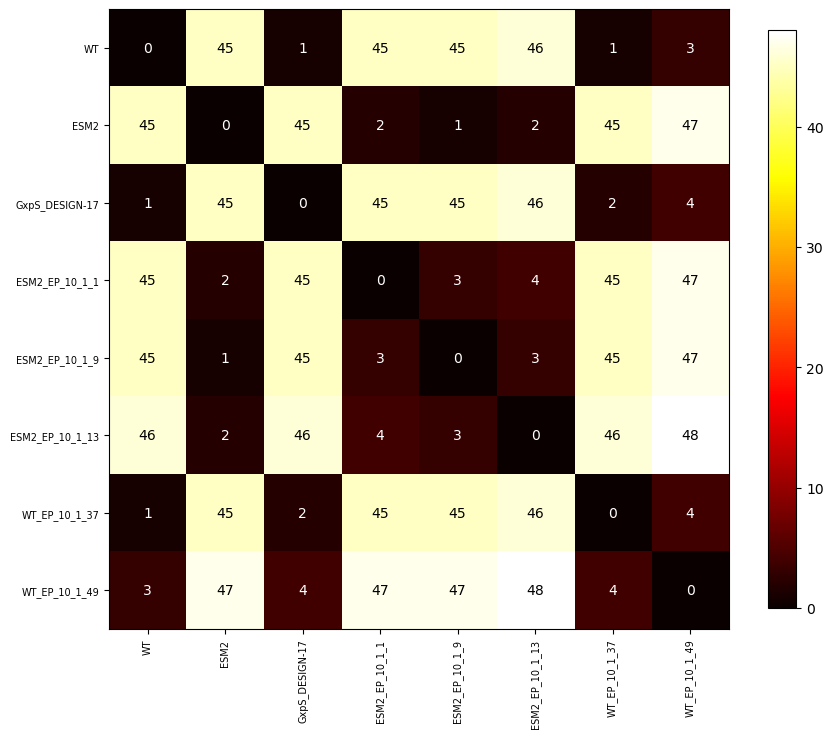

In [23]:
ai_gen = ['WT',
 'ESM2',
 'GxpS_DESIGN-17',
 'ESM2_EP_10_1_1',
 'ESM2_EP_10_1_9',
 'ESM2_EP_10_1_13',
 'WT_EP_10_1_37',
 'WT_EP_10_1_49']

mask = df_new['name'].isin(ai_gen)
_df = df_new[mask]
_df['name'] = pd.Categorical(_df['name'], categories=ai_gen, ordered=True)
_df = _df.sort_values('name')

dist_matrix = np.eye(_df['seq'].shape[0])
sequences = _df['seq'].to_numpy()
for i in range(sequences.shape[0]):
    for j in range(sequences.shape[0]):
        dist_matrix[i, j] = hamming_distance(sequences[i], sequences[j])

plt.figure(figsize=(10,10))
plt.imshow(dist_matrix, cmap='hot')
plt.colorbar(shrink=0.75)
plt.xticks(np.arange(len(ai_gen)), ai_gen, size=7, rotation=90)
plt.yticks(np.arange(len(ai_gen)), ai_gen, size=7)

# Adding text annotations
for i in range(len(ai_gen)):
    for j in range(len(ai_gen)):
        plt.text(
            j, i, f"{int(dist_matrix[i, j])}",  # Formatting to 2 decimal places
            ha='center', va='center', color='white' if dist_matrix[i, j] < 5 else 'black', fontsize=10
        )

plt.show()

In [24]:
df_new[df_new['name'].str.contains('WT')]

,name,seq,fitness_raw,split_id,n_mut,fitness_log
0,WT,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,1.000000,2,0,0.000000
31,II guidance-WT,APGADAYAQQAYEAPQGEAEQRLAAIWAELLGVERVGRHDNFFELG...,1.058648,2,34,0.056993
73,WT_EP_10_1_34,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFYALG...,0.460611,2,1,-0.775201
74,WT_EP_10_1_35,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,0.498241,2,1,-0.696672
75,WT_EP_10_1_36,APGEDAFARQAYQAPQGEIEIALAIIWRELLNVEEVGRHDSIFALG...,0.097123,2,4,-2.331775
76,WT_EP_10_1_37,APGEDAFARQAYQAPHGEIEIALATIWRELLNVEQVGRHDSFFALG...,1.007817,2,1,0.007787
77,WT_EP_10_1_38,APGEDAFARQAYQAPQGEIEIALATIWGELLNVEQVGRHDSFFALG...,0.909221,2,1,-0.095167
78,WT_EP_10_1_40,SPGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,0.380659,2,1,-0.965852
79,WT_EP_10_1_41,APGEDAFARQAYLAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,0.571728,2,2,-0.559091
80,WT_EP_10_1_45,APGEDAFARQAYQAPQGKIEIALATIWRELLNVEQVGRHDSFFALG...,0.941038,2,2,-0.060772


In [25]:
df_new[df_new['fitness_raw'] >=1.0 ]

,name,seq,fitness_raw,split_id,n_mut,fitness_log
0,WT,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,1.000000,2,0,0.000000
26,evodiff_gen_155,EPDDAAFVRHVYQAPQGEVETQLAAIWEDLLGVERVGRHDNFFELG...,1.035816,0,50,0.035190
31,II guidance-WT,APGADAYAQQAYEAPQGEAEQRLAAIWAELLGVERVGRHDNFFELG...,1.058648,2,34,0.056993
48,GxpS_DESIGN-17,APGEDAFARQAYQAPQGEIEIALATIWRELLNVRQVGRHDSFFALG...,1.031657,2,1,0.031167
59,ESM2_EP_10_1_1,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,1.501961,0,45,0.406771
62,ESM2_EP_10_1_9,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,1.461114,0,45,0.379199
65,ESM2_EP_10_1_13,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,1.215484,0,46,0.195143
76,WT_EP_10_1_37,APGEDAFARQAYQAPHGEIEIALATIWRELLNVEQVGRHDSFFALG...,1.007817,2,1,0.007787
82,WT_EP_10_1_49,ALGGDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFVLG...,1.315126,2,3,0.273932


In [26]:
df_new['name'].to_numpy()

array(['WT', 'ESM1', 'ESM2', 'ESM3', 'ESM4', 'IN1', 'IN2', 'IN3', 'IN4',
       'IN5', 'IN6', 'IN7', 'esm3_gen_17', 'esm3_str_gen_53',
       'esm3_str_gen_170', 'esm3_gen_192', 'esm3_gen_333',
       'esm3_str_gen_365', 'esm3_gen_385', 'evodiff_gen_77',
       'II_guidance-ESM3', 'Test-IN1-improved', 'Test-IN4-improved',
       'Test-IN7-improved', 'evodiff_gen_21', 'evodiff_gen_88',
       'evodiff_gen_155', 'evodiff_gen_357', 'esm3_gen_93',
       'esm3_str_gen_314', 'esm3_str_gen_323', 'II guidance-WT',
       'II guidance-ESM2', 'II guidance-IN2', 'prob_guidancd-ESM2',
       'Test-IN2-improved', 'Test-IN5-improved', 'GxpS_DESIGN-1',
       'GxpS_DESIGN-3', 'GxpS_DESIGN-4', 'GxpS_DESIGN-5', 'GxpS_DESIGN-6',
       'GxpS_DESIGN-7', 'GxpS_DESIGN-8', 'GxpS_DESIGN-9',
       'GxpS_DESIGN-11', 'GxpS_DESIGN-14', 'GxpS_DESIGN-16',
       'GxpS_DESIGN-17', 'GxpS_DESIGN-18', 'GxpS_DESIGN-19',
       'GxpS_DESIGN-20', 'GxpS_DESIGN-21', 'GxpS_DESIGN-22',
       'GxpS_DESIGN-23', 'GxpS_DESIGN

Text(0.5, 1.0, 'Test')

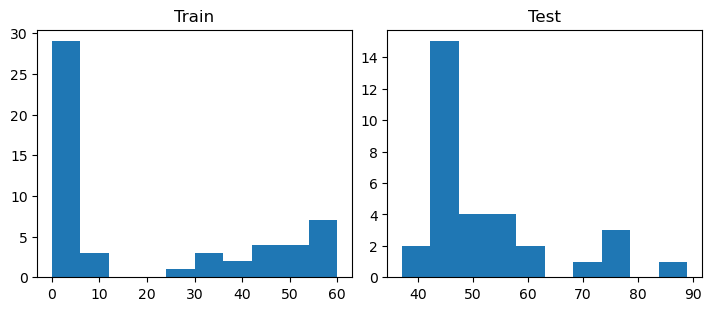

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(7,3), layout='constrained')
ax[0].hist(df_new.loc[df_new['split_id']==2, 'n_mut'])
ax[1].hist(df_new.loc[df_new['split_id'].isin([0, 1]), 'n_mut'])
ax[0].set_title('Train')
ax[1].set_title('Test')

/tmp/ipykernel_2266707/1061857453.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_new.groupby('n_mut_bin')['fitness_raw'].apply(list)


Text(0, 0.5, 'number of datapoints')

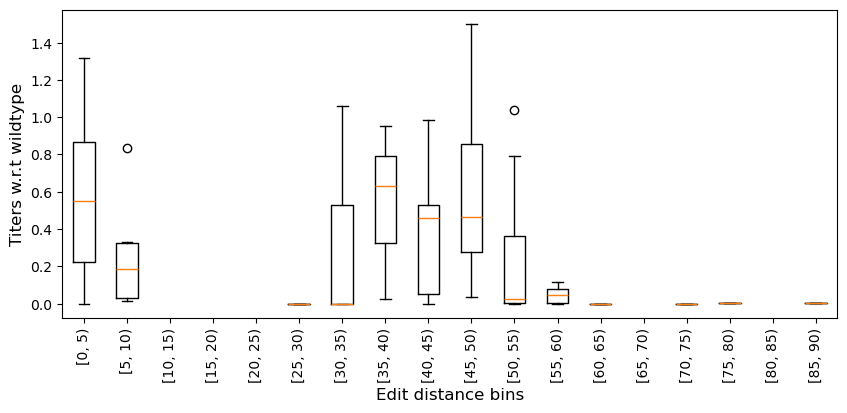

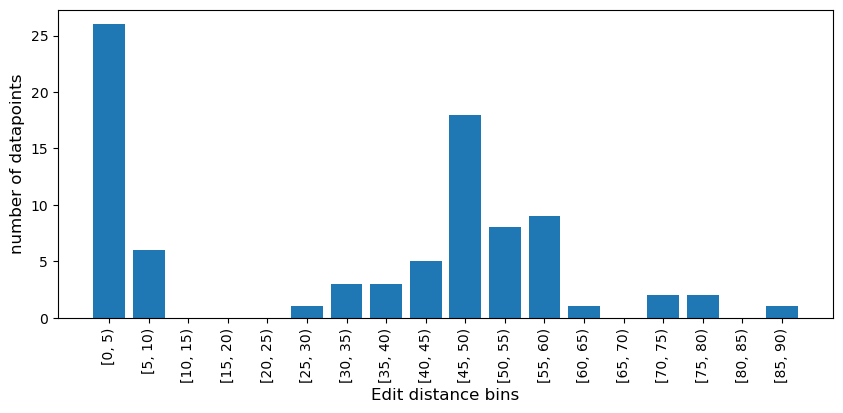

In [37]:
bin_edges = np.arange(0, max(df_new['n_mut']) + 5, 5)
df_new['n_mut_bin'] = pd.cut(df_new['n_mut'], bins=bin_edges, right=False)
grouped = df_new.groupby('n_mut_bin')['fitness_raw'].apply(list)
boxplot_data = [group for group in grouped]

plt.figure(figsize=(10, 4))
plt.boxplot(boxplot_data, labels=[str(group) for group in grouped.index], vert=True)
plt.xticks(rotation=90)
plt.xlabel('Edit distance bins', size=12)
plt.ylabel('Titers w.r.t wildtype', size=12)

plt.figure(figsize=(10, 4))
plt.bar([str(group) for group in grouped.index],[len(x) for x in boxplot_data])
plt.xticks(rotation=90)
plt.xlabel('Edit distance bins', size=12)
plt.ylabel('number of datapoints', size=12)